In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwards')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.data.path.append(r'C:\Users\USER\AppData\Roaming\nltk_data')
import pandas as pd
import matplotlib as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading stopwards: Package 'stopwards' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv("spam_sms.csv")
df.head()

,v1,v2
0,ham,"life Goes until jurong point, crazy.. Availabl..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.columns = ['label','content']

In [4]:
df

,label,content
0,ham,"life Goes until jurong point, crazy.. Availabl..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='label'>

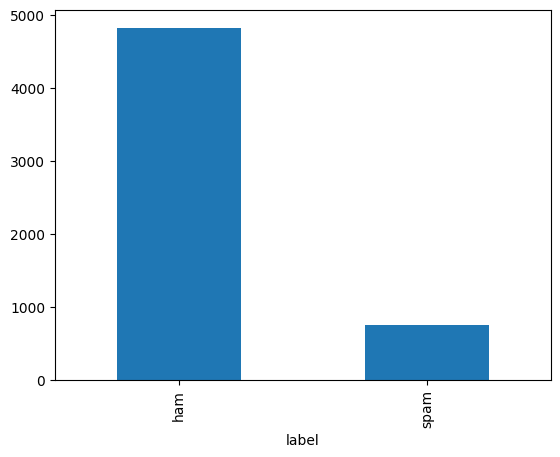

In [5]:
df['label'].value_counts().plot(kind='bar')

## Task2 Removing Punctuation

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct
df['content_clean'] = df['content'].apply(lambda x: remove_punct(x))

df.head()

,label,content,content_clean
0,ham,"life Goes until jurong point, crazy.. Availabl...",life Goes until jurong point crazy Available o...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


## Task3 Tokeniation

In [8]:
from nltk.tokenize import word_tokenize

In [9]:
# df['content_tokenized'] = df['content_clean'].apply(lambda x: word_tokenize(x.lower()))
df['content_tokenized'] = df['content_clean'].apply(lambda x: x.split())

In [10]:
df.head()

,label,content,content_clean,content_tokenized
0,ham,"life Goes until jurong point, crazy.. Availabl...",life Goes until jurong point crazy Available o...,"[life, Goes, until, jurong, point, crazy, Avai..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l..."


## Task4 Removing Stopwords

In [11]:
import nltk

nltk.download('stopwords')

stopword = nltk.corpus.stopwords.words('english')

print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text
df['content_nostop'] = df['content_tokenized'].apply(lambda x: remove_stopwords(x))

In [13]:
df.head()

,label,content,content_clean,content_tokenized,content_nostop
0,ham,"life Goes until jurong point, crazy.. Availabl...",life Goes until jurong point crazy Available o...,"[life, Goes, until, jurong, point, crazy, Avai...","[life, Goes, jurong, point, crazy, Available, ..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around..."


## Task5 Stemming (porter stemming)

###### Definition: Stemming is a crude heuristic process that removes word endings (suffixes) to reduce a word to its base form or root, which may not always be a valid word in the language.
###### Approach: It uses simple rules like cutting off common endings (e.g., -ing, -ed, -ly).
###### Output: The result is often not a valid word, but rather a stem. For example, "playing" may become "play," but "studies" could become "studi."
###### Speed: Fast because it does not involve complex linguistic analysis.
###### Accuracy: Lower accuracy since it doesn't consider the meaning or grammatical role of the word.
###### Example:
###### "Caring" → "car"
###### "Studies" → "studi"
###### Common algorithms: Porter Stemmer, Snowball Stemmer.

In [14]:
ps = nltk.PorterStemmer()

In [15]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df['content_stemmed'] = df['content_nostop'].apply(lambda x: stemming(x))

df.head()

,label,content,content_clean,content_tokenized,content_nostop,content_stemmed
0,ham,"life Goes until jurong point, crazy.. Availabl...",life Goes until jurong point crazy Available o...,"[life, Goes, until, jurong, point, crazy, Avai...","[life, Goes, jurong, point, crazy, Available, ...","[life, goe, jurong, point, crazi, avail, bugi,..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ..."


## Task6: Lemmatization

###### Definition: Lemmatization reduces words to their lemma, which is the base or dictionary form of a word, ensuring the result is a valid word in the language.
###### Approach: It considers the meaning and context of the word, requiring the word's part of speech (POS). For example, "better" is reduced to "good" (adjective), but "am" becomes "be" (verb).
###### Output: The result is a valid word that makes sense in the language.
###### Speed: Slower compared to stemming since it involves more complex linguistic processing.
###### Accuracy: Higher accuracy due to understanding the word's context and meaning.
###### Example:
###### "Caring" → "care"
###### "Studies" → "study"
###### Common tools: WordNet Lemmatizer.

In [16]:
wn = nltk.WordNetLemmatizer()

In [17]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['content_lemmetized'] = df['content_nostop'].apply(lambda x: lemmatizing(x))

df.head()

,label,content,content_clean,content_tokenized,content_nostop,content_stemmed,content_lemmetized
0,ham,"life Goes until jurong point, crazy.. Availabl...",life Goes until jurong point crazy Available o...,"[life, Goes, until, jurong, point, crazy, Avai...","[life, Goes, jurong, point, crazy, Available, ...","[life, goe, jurong, point, crazi, avail, bugi,...","[life, Goes, jurong, point, crazy, Available, ..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ...","[Nah, I, dont, think, go, usf, life, around, t..."


## Task7: Vectorizing (Count Vectorizer)

###### Vectorizing in Natural Language Processing (NLP) is the process of converting text data into numerical format so that machine learning models can understand and process it. Text data, in its raw form, consists of strings, which models cannot work with. Vectorization transforms this text into vectors, i.e., arrays of numbers, making it usable for algorithms.

##### Why is Vectorizing Important?
###### Machine learning algorithms need numbers: Algorithms can only process numerical data. Since text is inherently non-numeric, vectorizing converts text into a numeric format.
###### Representation of text: Vectorization encodes information about the structure, meaning, and context of the text into vectors that models can use for predictions and analysis.
###### Feature extraction: It allows the model to capture key features from the text such as word frequency, relationships between words, or semantic meaning.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
df['cleaned_content'] = df['content_lemmetized'].apply(lambda x: " ".join(x))

In [20]:
df.head()

,label,content,content_clean,content_tokenized,content_nostop,content_stemmed,content_lemmetized,cleaned_content
0,ham,"life Goes until jurong point, crazy.. Availabl...",life Goes until jurong point crazy Available o...,"[life, Goes, until, jurong, point, crazy, Avai...","[life, Goes, jurong, point, crazy, Available, ...","[life, goe, jurong, point, crazi, avail, bugi,...","[life, Goes, jurong, point, crazy, Available, ...",life Goes jurong point crazy Available bugis n...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]",Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[U, dun, say, early, hor, U, c, already, say]",U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ...","[Nah, I, dont, think, go, usf, life, around, t...",Nah I dont think go usf life around though


In [21]:
# this task is for sample displaying
data_sample = df[0:20]

cv = CountVectorizer(ngram_range=(2,2))
result_vector = cv.fit_transform(data_sample['cleaned_content'])
print(result_vector.shape)
print(cv.get_feature_names_out())
feature_names = list(cv.get_feature_names_out())

(20, 243)
['09061701461 claim' '100 20000' '100000 prize' '11 month' '12 hour'
 '150 rcv' '150pday 6days' '16 tsandcs' '20000 pound' '2005 text'
 '21st may' '4txtì¼120 poboxox36504w45wq' '6days 16' '81010 tc' '87077 eg'
 '87077 trywales' '87121 receive' '87575 cost' '900 prize' 'aid patent'
 'already say' 'amore wat' 'anymore tonight' 'apply 08452810075over18s'
 'apply reply' 'around though' 'as per' 'as valued' 'available bugis'
 'back id' 'blessing time' 'breather promise' 'brother like' 'buffet cine'
 'bugis great' 'call 09061701461' 'call the' 'callers press'
 'callertune callers' 'camera free' 'cash from' 'chance win' 'chgs send'
 'cine got' 'claim call' 'claim code' 'claim no' 'click httpwap'
 'click wap' 'co free' 'code kl341' 'colour mobile' 'comp win'
 'copy friend' 'cost 150pday' 'crazy available' 'credit click'
 'cried enough' 'csh11 send' 'cup final' 'customer selected'
 'darling week' 'date on' 'dont miss' 'dont think' 'dont want' 'dun say'
 'early hor' 'eg england' 'eh re

In [22]:
feature_names

['09061701461 claim',
 '100 20000',
 '100000 prize',
 '11 month',
 '12 hour',
 '150 rcv',
 '150pday 6days',
 '16 tsandcs',
 '20000 pound',
 '2005 text',
 '21st may',
 '4txtì¼120 poboxox36504w45wq',
 '6days 16',
 '81010 tc',
 '87077 eg',
 '87077 trywales',
 '87121 receive',
 '87575 cost',
 '900 prize',
 'aid patent',
 'already say',
 'amore wat',
 'anymore tonight',
 'apply 08452810075over18s',
 'apply reply',
 'around though',
 'as per',
 'as valued',
 'available bugis',
 'back id',
 'blessing time',
 'breather promise',
 'brother like',
 'buffet cine',
 'bugis great',
 'call 09061701461',
 'call the',
 'callers press',
 'callertune callers',
 'camera free',
 'cash from',
 'chance win',
 'chgs send',
 'cine got',
 'claim call',
 'claim code',
 'claim no',
 'click httpwap',
 'click wap',
 'co free',
 'code kl341',
 'colour mobile',
 'comp win',
 'copy friend',
 'cost 150pday',
 'crazy available',
 'credit click',
 'cried enough',
 'csh11 send',
 'cup final',
 'customer selected',
 'darl

## Task8: Creating Vector DataFrame

In [23]:
result_vector_df = pd.DataFrame(result_vector.toarray())
result_vector_df.columns = cv.get_feature_names_out()
result_vector_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150 rcv,150pday 6days,16 tsandcs,20000 pound,2005 text,...,word back,word claim,word thank,world la,wwwdbuknet lccltd,xxx std,xxxmobilemovieclub to,yes he,you week,you wonderful
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Task9: Text Classification Model Building (Tfidf Vectorizer)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer


#Prepare data and labels
X = df['cleaned_content']
y = df['label']

#TfId Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)
print(X_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 47142 stored elements and shape (5572, 5000)>
  Coords	Values
  (0, 2535)	0.23812775718062085
  (0, 3160)	0.27419805492029276
  (0, 1445)	0.30634600514871935
  (0, 814)	0.30080318466792305
  (0, 1160)	0.33418379245270713
  (0, 2064)	0.22017182980113595
  (0, 4897)	0.268823617782537
  (0, 2475)	0.33418379245270713
  (0, 1159)	0.3776195862770545
  (0, 1318)	0.33418379245270713
  (0, 2049)	0.18583407427351364
  (0, 4782)	0.22554626693889174
  (1, 2990)	0.2741803362458879
  (1, 2489)	0.4080505634471753
  (1, 2396)	0.5233273701797004
  (1, 4848)	0.4313385731102942
  (1, 3004)	0.5462557824449175
  (2, 1926)	0.11509704434096285
  (2, 1737)	0.3573358770638972
  (2, 4877)	0.1891395742846073
  (2, 1372)	0.1952406846233997
  (2, 4856)	0.1462510447348445
  (2, 1804)	0.46628848811198675
  (2, 1464)	0.20310638388373506
  (2, 1859)	0.18267631774267226
  :	:
  (5568, 2194)	0.3316880414431011
  (5568, 4854)	0.4231274093989247
  (5568, 2033)	

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

#Split data into train and test sets
X_train, X_test,y_train,y_test = train_test_split(X_tfidf, y,test_size=0.2,random_state=42)

#Initialize SVM Classifier
svm = LinearSVC(random_state=42)

#train the classifier
svm.fit(X_train,y_train)

LinearSVC(random_state=42)

## Task10: Model Evaluation

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#predictions
y_pred = svm.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

#classification report
report = classification_report(y_test,y_pred)
print(report)

Accuracy: 0.9802690582959641
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

